## Exploratory Data Analysis

### EDA for Client demographic data

#### Import necessary libraries

In [131]:
# Load necessary libraries
import pandas as pd
import numpy as np
import scipy as sc
from collections import defaultdict
from datetime import datetime
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Since our data is more or less clean we will start exploring by deviding it in to numerical and catagorical variables. So, We will create one for each variable. 

In [106]:
# Load the data
demog = pd.read_csv('demog.csv')
demog.head(2)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6,73,60,U,2,45105,6,9
1,2304905,7,94,58,U,2,110860,6,9


In [107]:
# Drop unnamed: 0 column 
#demo = demog.drop('Unnamed: 0', axis = 'columns')
#demo.head(2)

In [108]:
demog.shape

(70594, 9)

In [109]:
# Extract column names with numerical datatype
demog.select_dtypes("number").columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

In [110]:
# Count and sort the unique values of each numeriacl variables
demo_num = demog.select_dtypes("number").nunique().sort_values(ascending = False)
demo_num

client_id           70594
bal                 56968
clnt_tenure_mnth      482
clnt_age               82
clnt_tenure_yr         54
logons_6_mnth           9
num_accts               8
calls_6_mnth            8
dtype: int64

Lat's take gendr and do the exploration.

In [111]:
# Frequency table for grnder
freq_tab = demog['gendr'].value_counts()
freq_tab

gendr
U    24122
M    23724
F    22745
X        3
Name: count, dtype: int64

In [112]:
prop_table = pd.crosstab(index = demog['gendr'], columns = "count")
(prop_table/prop_table.sum()).round(2)

col_0,count
gendr,
F,0.32
M,0.34
U,0.34
X,0.00


Insight: * The most common gender classification is Male, Female, and Undisclosed. That comprising approximately 34%, 34% and 32% respectively.
         
         * The last which is the least frequent gender is Unspecified, making up only 3.

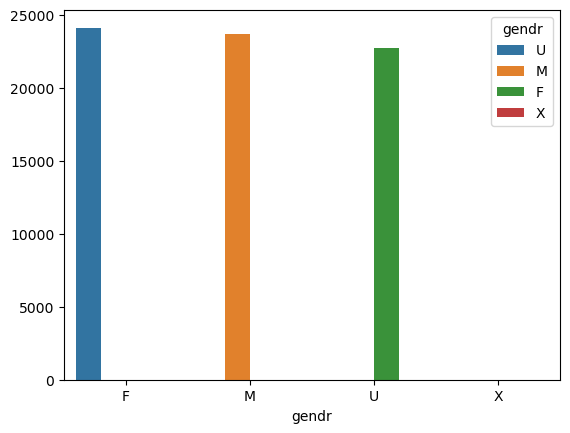

In [113]:
#ax=sns.barplot(y=prop_table.index, x=freq_tab.values, hue=freq_tab.index)
#sns.move_legend(ax, "lower right")
sns.barplot(y = freq_tab.values, x = prop_table.index, hue = freq_tab.index)
plt.show()

From the above chart we observe the same result as the value counts. Three of the gender group covers almost the whole portion, which is Female, Male and Undisclosed. 

Now let's move in to the numerical Vs Catagorical variables. And answer the questions like: 
1. Who are the primary clients using this online process? From the above analysis we can say that; the primary clients in gender wise are Female, Male and Undisclosed.2. 
Are the primary clients younger or older, new or long-standing? From the below graph we can understand that most of the clients are young and middle age. Most of them are in the year between 6 to 21 since they have joined. And the rest have been staying between 36 to 62 years.

In [75]:
demo_num.head()

client_id           70594
bal                 56968
clnt_tenure_mnth      482
clnt_age               82
clnt_tenure_yr         54
dtype: int64

In [85]:
# The top 20 who stayed longer and lesser 
top20_year_long = demog['clnt_tenure_yr'].value_counts().head(20)
# Top 20 who stayed lesser
top20_year_new = demog['clnt_tenure_yr'].value_counts().sort_values().head(20)
top20_year_long

clnt_tenure_yr
6     7092
5     6955
7     4955
4     4687
15    4564
8     4044
14    3646
12    3631
13    3607
9     3357
11    2920
10    2775
16    2714
21    2257
20    1580
22    1492
17    1373
23    1279
18    1206
19    1153
Name: count, dtype: int64

In [77]:
conditions = [
    (demog['clnt_age']>=14) & (demog['clnt_age']<=30),
    (demog['clnt_age']>=31) & (demog['clnt_age']<=45),
    (demog['clnt_age']>=46) & (demog['clnt_age']<=60),
    (demog['clnt_age']>=61) & (demog['clnt_age']<=75),
    (demog['clnt_age']>=76) & (demog['clnt_age']<=96),
]

values = ['14-30','31-45','46-60','61-75','76-96']
demog['age_category'] = np.select(conditions, values)

In [78]:
demog.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,age_category
0,836976,6,73,60,U,2,45105,6,9,46-60
1,2304905,7,94,58,U,2,110860,6,9,46-60
2,1439522,5,64,32,U,2,52467,6,9,31-45
3,1562045,16,198,49,M,2,67454,3,6,46-60
4,5126305,12,145,33,F,2,103671,0,3,31-45


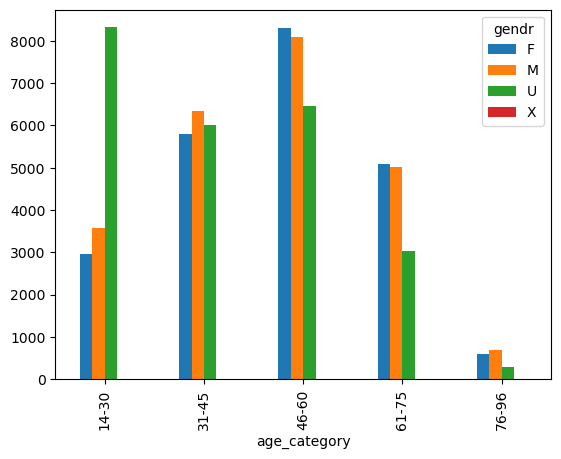

In [84]:
pd.crosstab(demog['age_category'],demog['gendr']).plot.bar()
plt.show()

In [15]:
demog['num_accts'].value_counts().sort_values()

num_accts
8        1
1        2
7        8
6       33
5      284
4     2241
3    12529
2    55496
Name: count, dtype: int64

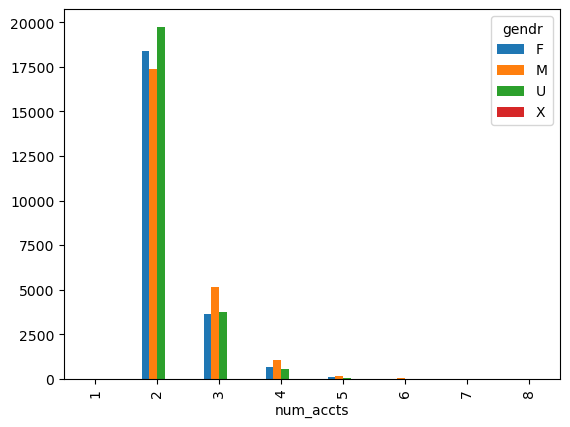

In [16]:
#Let's see gender by number of accounts.
pd.crosstab(demog['num_accts'],demog['gendr']).plot.bar()
plt.show()

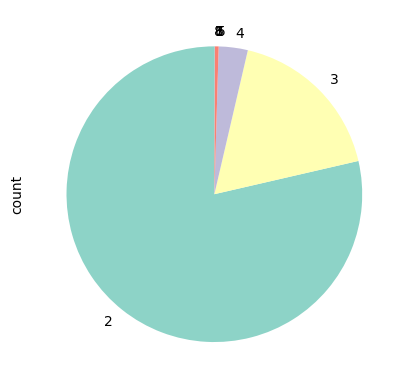

In [17]:
demog['num_accts'].value_counts().plot.pie(startangle=90, colors=sns.color_palette("Set3"));
plt.show()

### EDA for Web_Data

In [18]:
web_data = pd.read_csv('web_data.csv')
web_data.head(2)

,client_id,visitor_id,visit_id,process_step,date_time,date,time,year,month,day
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,4/17/2017 15:27,"2017, 27, 17","15, 27, 07",2017,4,17
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,4/17/2017 15:26,"2017, 26, 17","15, 26, 51",2017,4,17


In [19]:
#web_data = web_data.drop('Unnamed: 0', axis = 'columns')
#web_data.head(2)

In [20]:
web_data['process_step'].value_counts()

process_step
start      234999
step_1     162797
step_2     132750
step_3     111589
confirm    102506
Name: count, dtype: int64

In [21]:
web_data.shape

(744641, 10)

In [22]:
web_data.nunique()

client_id       120157
visitor_id      130236
visit_id        158095
process_step         5
date_time        96077
date              1860
time             77640
year                 1
month                4
day                 31
dtype: int64

Let's calculate the time difference.  

Now let us extract the confirmed and start processes step and save it in to csv file.

In [23]:
pro_start = web_data[web_data["process_step"] == "start"]
pro_start.shape

(234999, 10)

In [24]:
pro_confirm = web_data[web_data["process_step"] == "confirm"]
pro_confirm.shape

(102506, 10)

In [25]:
# Now let's save both files in to csv format
pro_start.to_csv("pro_start.csv")
pro_confirm.to_csv("pro_confirm.csv")

### EDA for final experement client data

In [26]:
final_ex = pd.read_csv('final_ex.csv')
final_ex.head()

,client_id,variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [27]:
# Drop the Unnamed: 0 column
#final_ex.head(2)

In [28]:
final_ex.nunique()

client_id    50500
variation        2
dtype: int64

In [29]:
final_ex['variation'].value_counts()

variation
Test       26968
Control    23532
Name: count, dtype: int64

Let's devide the dataset in to two \Test and Control group\

In [30]:
test_group = final_ex[final_ex["variation"] == "Test"]
test_group.shape

(26968, 2)

In [31]:
# Since we will merge the datasets let's change the column names of variations accordingly
test_group.columns = ['client_id', 'variation_test']
test_group.head(2)

,client_id,variation_test
0,9988021,Test
1,8320017,Test


In [32]:
control_group = final_ex[final_ex["variation"] == "Control"]
control_group.shape

(23532, 2)

In [33]:
control_group.columns = ['client_id', 'variation_control']
control_group.head(2)

,client_id,variation_control
2,4033851,Control
4,9294070,Control


In [34]:
# Let's save them to csv file
test_group.to_csv("test_group.csv")
control_group.to_csv("control_group.csv")

Let's merge the data first for test group then control group

In [35]:
#Let us merge the dataset based on client_ID for test group and demog
merge_1 = pd.merge(demog, test_group, on='client_id')

In [36]:
# Let us check our dataset
merge_1.head(2)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,age_category,variation_test
0,836976,6,73,60,U,2,45105,6,9,46-60,Test
1,1439522,5,64,32,U,2,52467,6,9,31-45,Test


In [37]:
merge_1.shape

(26961, 11)

In [38]:
# now let's merge the dataset of merge_1 and web_data
test_merge = pd.merge(web_data, merge_1, on = 'client_id')

In [39]:
# Lets check the dataset
test_merge.head(2)

,client_id,visitor_id,visit_id,process_step,date_time,date,time,year,month,day,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,age_category,variation_test
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,4/17/2017 15:27,"2017, 27, 17","15, 27, 07",2017,4,17,5,64,79,U,2,189023,1,4,76-96,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,4/17/2017 15:26,"2017, 26, 17","15, 26, 51",2017,4,17,5,64,79,U,2,189023,1,4,76-96,Test


In [40]:
test_merge.shape

(176641, 20)

In [41]:
# Let's save the dataset of test_merge
test_merge.to_csv("test_merge.csv")

In [42]:
test_merge['process_step'].value_counts()

process_step
start      55753
step_1     38651
step_2     30888
step_3     25755
confirm    25594
Name: count, dtype: int64

Let us move to control group

In [43]:
# First we merge control_group with demog
merge_2 = pd.merge(demog, control_group, on = 'client_id')

In [44]:
merge_2.head(2)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,age_category,variation_control
0,2304905,7,94,58,U,2,110860,6,9,46-60,Control
1,5126305,12,145,33,F,2,103671,0,3,31-45,Control


In [45]:
# Now we will merge merge_2 dataset and web_data
control_merge = pd.merge(web_data, merge_2, on = 'client_id')

In [46]:
control_merge.head(2)

,client_id,visitor_id,visit_id,process_step,date_time,date,time,year,month,day,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,age_category,variation_control
0,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,4/5/2017 12:29,"2017, 29, 05","12, 29, 03",2017,4,5,12,149,64,M,2,142642,5,8,61-75,Control
1,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,4/5/2017 12:29,"2017, 29, 05","12, 29, 01",2017,4,5,12,149,64,M,2,142642,5,8,61-75,Control


In [47]:
control_merge.shape

(140482, 20)

In [48]:
# Now save it in to csv file
control_merge.to_csv("control_merge.csv")

In [49]:
control_merge['process_step'].value_counts()

process_step
start      45361
step_1     29533
step_2     25764
step_3     22495
confirm    17329
Name: count, dtype: int64

#### Let's sort the control group (control_merge) dataframe based on client_id, visit_id, Process_step, date, time.

In [50]:
# First let's list the columns name 
list(control_merge.columns.values.tolist())

['client_id',
 'visitor_id',
 'visit_id',
 'process_step',
 'date_time',
 'date',
 'time',
 'year',
 'month',
 'day',
 'clnt_tenure_yr',
 'clnt_tenure_mnth',
 'clnt_age',
 'gendr',
 'num_accts',
 'bal',
 'calls_6_mnth',
 'logons_6_mnth',
 'age_category',
 'variation_control']

In [51]:
control_sorted = control_merge.sort_values(['client_id','visit_id', 'process_step', 'date', 'time'], ascending = [True, True, True, True, True])

In [52]:
control_sorted.head(2)

,client_id,visitor_id,visit_id,process_step,date_time,date,time,year,month,day,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,age_category,variation_control
60086,1028,42237450_62128060588,557292053_87239438319_391157,start,4/8/2017 18:51,"2017, 51, 08","18, 51, 28",2017,4,8,12,145,36,M,3,103520,1,4,31-45,Control
60080,1028,42237450_62128060588,557292053_87239438319_391157,step_1,4/8/2017 19:00,"2017, 00, 08","19, 00, 15",2017,4,8,12,145,36,M,3,103520,1,4,31-45,Control


In [366]:
# Save control_sorted data
control_sorted.to_csv("control_sorted.csv")

#### Let's sort the test group (test_merge) dataframe based on client_id, visit_id, Process_step, date, time.

In [53]:
test_sorted = test_merge.sort_values(['client_id', 'visit_id','process_step','date', 'time'], ascending = [True, True, True, True, True])

In [54]:
test_sorted.head(2)

,client_id,visitor_id,visit_id,process_step,date_time,date,time,year,month,day,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,age_category,variation_test
43852,555,402506806_56087378777,637149525_38041617439_716659,confirm,4/15/2017 13:00,"2017, 00, 15","13, 00, 34",2017,4,15,3,46,30,U,2,25454,2,6,14-30,Test
43856,555,402506806_56087378777,637149525_38041617439_716659,start,4/15/2017 12:57,"2017, 57, 15","12, 57, 56",2017,4,15,3,46,30,U,2,25454,2,6,14-30,Test


In [365]:
# Save test sorted data
test_sorted.to_csv("test_sorted.csv")

#### Let's do the three kpi's for the control_group "Completion rate , Average time spent, Time spent on each step, Error rate"

#### Completion rate 

## Load the data here again to make things simple

In [114]:
import pandas as pd
control_sorted = pd.read_csv("control_sorted.csv")

In [115]:
# Calculate for the total confirmed process step
process_step_confirm = len(control_sorted[control_sorted['process_step'] == 'confirm'])
process_step_confirm

17329

In [116]:
# Calculate for the total process step
process_step_total = len(control_sorted['process_step'])
process_step_total

140482

In [117]:
# Calculate for the completion rate
completion_rate = (process_step_confirm/process_step_total)
completion_rate

0.12335388163608149

In [118]:
# Open dictionary to store time differences for each client ID
control_sorted2 = control_sorted[['client_id','time']]
control_sorted2_list = control_sorted2.values.tolist()

time_diffs = defaultdict(list)

# Parse timestamps and group by client ID
for client_id, time in control_sorted2_list:
    time_diffs[client_id].append(datetime.strptime(time, '%H, %M, %S'))

In [119]:
# Calculate time differences for each client ID
time_diffrence1 = []
time_diffrence2 = []
for client_id, time in time_diffs.items():
    time.sort()  # Ensure timestamps are sorted
    for i in range(1, len(time)):
        time_diff = time[i] - time[i - 1]
        time_diffrence1.append(client_id)
        time_diffrence2.append(time_diff)
        #print(f"Client ID: {client_id}, Time difference: {time_diff}")

In [120]:
time_differ1 = pd.DataFrame(time_diffrence1)
time_differ2 = pd.DataFrame(time_diffrence2)

In [121]:
# Set the column names for both dataframes
time_differ2.columns = ['time_diffrence']
time_differ1.columns = ['client_id']

In [122]:
# df2 = pd.concat([df2, extracted_col.rename("Col3_from_df1")], axis=1)
time_differ1 = pd.concat([time_differ1, time_differ2], axis = 1)

In [123]:
# total_time spent is equal with time deffrence
time_differ1.head()

,client_id,time_diffrence
0,1028,0 days 00:00:49
1,1028,0 days 00:01:03
2,1028,0 days 00:00:09
3,1028,0 days 00:04:35
4,1028,0 days 00:01:51


In [124]:
time_differ1.to_csv('time_differ1_control.csv')

In [125]:
# total time spent 
total_time = time_differ1['time_diffrence'].sum()
total_time

Timedelta('1363 days 14:54:24')

In [126]:
# average time spent 
avg_time = time_differ1['time_diffrence'].mean()
avg_time

Timedelta('0 days 00:16:47.360580047')

In [127]:
# Let's merge time_diffre1 with control_merge based on client_id
control_diffre = pd.merge(control_sorted, time_differ1, on = 'client_id')

In [128]:
control_diffre.head(2)

,client_id,visitor_id,visit_id,process_step,date_time,date,time,year,month,day,...,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,age_category,variation_control,time_diffrence
0,1028,42237450_62128060588,557292053_87239438319_391157,start,4/8/2017 18:51,"2017, 51, 08","18, 51, 28",2017,4,8,...,145,36,M,3,103520,1,4,31-45,Control,0 days 00:00:49
1,1028,42237450_62128060588,557292053_87239438319_391157,start,4/8/2017 18:51,"2017, 51, 08","18, 51, 28",2017,4,8,...,145,36,M,3,103520,1,4,31-45,Control,0 days 00:01:03


### Calculate Time spent on each step

In [129]:
# Add new column imestamp
#control_diffre['timestamp'] = control_diffre['time'] + control_diffre['date']

In [130]:
# Check the dataframe
#control_diffre.head(2)

In [103]:
# Convert timestamp column to datetime
control_diffre['date_time'] = pd.to_datetime(control_diffre['date_time'])

# Sort DataFrame by client ID and timestamp
control_diffre = control_diffre.sort_values(by=['client_id', 'date_time'])

# Calculate time spent on each step for each client
control_diffre['date_time'] = control_diffre.groupby('client_id')['date_time'].diff().dt.total_seconds()

# Aggregate time spent on each step for each client
time_spent_per_step = control_diffre.groupby(['client_id', 'process_step'])['date_time'].sum().reset_index()
avg_time_spent_per_step = control_diffre.groupby(['client_id', 'process_step'])['date_time'].mean().reset_index()

print(avg_time_spent_per_step)

       client_id process_step  date_time
0           1028        start        0.0
1           1028       step_1        6.0
2           1028       step_2        0.0
3           1028       step_3       37.5
4           1104        start   744120.0
...          ...          ...        ...
92768    9998346      confirm       42.0
92769    9998346        start        0.0
92770    9998346       step_1        6.0
92771    9998346       step_2        3.0
92772    9998346       step_3        2.0

[92773 rows x 3 columns]


In [104]:
avg_time_spent_per_step['date_time'].median()

8.571428571428571

In [65]:
# Save the dataset
# avg_time_spent_per_step.to_csv("control_avg_time_spent_per_step.csv")

### Calculate Error rate on each step

#### Calculation process for submission successeful or not
How many unique client Id

Then we calculate how many times each client attempt to do the registration. 
    
eg. client 1028, total step taken / 5, devide by five becouse there are five steps a client should take to reach into confirm.

We expect in each five step there should be one confirmation to say the process got successful.Else, the process taken was not successful.

This formula will tell us how many attempts has been taken by the client "client 1028, total step taken / 5". If number of total step taken not devisible by five and even if it is devisible by five , 

if we do not get one confirm out of any five consequitive step of the processs taken by a client, this indicates that there were an error so that we will take it as 'not successful/False'. 


#### submission_successeful 
num_attempt = len(Unique client ID) devided by 5 ## To know how many attemptes has been taken 

num_confirm = len(confirm) 

Example: num_attempt = 50  

         num_confirm = 50 , if it is less than 50 there were an error process and we will give "True" to number of confirmed five step process and 
         
         "False" to the rest five or less than 5 step taken process.

In [269]:
# store unique client_id
client_id_unique = []
client_id_unique.append(control_sorted['client_id'].unique())

In [270]:
# display the unique client_id's
# Get unique client_ids
unique_client_ids = control_sorted['client_id'].unique()
# Iterate over each unique client_id
for client_id in unique_client_ids:
    # Extract rows based on the current client_id
    client_rows = control_sorted[control_sorted['client_id'] == client_id]

In [317]:
def att_conf(unique_client_ids):
    for client_id in unique_client_ids:
       attempt = control_sorted[control_sorted['client_id'] == client_id] # Extract the rows for each client_Id
       len_attempt = len(control_sorted[control_sorted['client_id'] == client_id]) # Sum of how many times apper each client_id in the dataframe
       num_attempt = len_attempt/5 # How many events(True or False) are there in each 5 steps (how many full process were there?)
       num_confirm = len(attempt [attempt['process_step'] == 'confirm']) # How many confirm events are there in a specific client_id
       print(client_id, ',' , num_attempt,',', num_confirm)

Now we take the number of confirm events and analyse it to Shows that there were no success then we will consider there were 9 attemptes 
that was unsccessful and, we will add 2 False value to the 'SubmissionSuccessful' column. And, we do the same for each client_id. 

We get and determine how many number of True or False we should include in submission_successful column. Number of confirm will tell us how many True events and to get False events we subtract Number of confirm from number of attempts. Then, we collect True and  False values to the submission_successful list.

In [321]:
# Here we will extract client_id with the date_time in 5 steps of interval.
df_error = control_sorted[['client_id','date_time']]
extracted_rows = df_error.iloc[::5]
extracted_rows.head()

,client_id,date_time
60086,1028,4/8/2017 18:51
60081,1028,4/8/2017 18:59
113923,1104,6/20/2017 22:31
6023,1195,4/5/2017 20:19
14225,1197,4/1/2017 17:17


In [322]:
# Let's import our unique client_id with their attempt and confirm event 
control_unique_id = pd.read_csv('cotrol_unique_client_id.csv')
control_unique_id.head()

,client_id,num_attempt,num_confirm,is_confirmation
0,1028,1.8,0,False
1,1104,0.4,0,False
2,1186,0.8,0,False
3,1195,1.0,1,True
4,1197,1.4,1,True


In [339]:
control_unique_id.shape

(23526, 4)

In [323]:
control_unique_id['is_confirmation'].value_counts()

is_confirmation
True     15428
False     8098
Name: count, dtype: int64

In [328]:
# Let's merge the dataset
df_err_rate = pd.merge(extracted_rows, control_unique_id, on = "client_id")
df_err_rate.head()

,client_id,date_time,num_attempt,num_confirm,is_confirmation
0,1028,4/8/2017 18:51,1.8,0,False
1,1028,4/8/2017 18:59,1.8,0,False
2,1104,6/20/2017 22:31,0.4,0,False
3,1195,4/5/2017 20:19,1.0,1,True
4,1197,4/1/2017 17:17,1.4,1,True


In [329]:
df_err_rate.shape

(28097, 5)

In [334]:
df_err_rate['is_confirmation'].value_counts()

is_confirmation
True     21610
False     6487
Name: count, dtype: int64

In [343]:
total_submissions = 28097
confirmed_submissions = 21610
error_submissions = 6487
error_rate = round((error_submissions / total_submissions) * 100)
confirmation_rate = round((confirmed_submissions / total_submissions) * 100)
print(error_rate, "||", confirmation_rate )

23 || 77


Let us check and verify with the unique client_id.

In [344]:
total_submission = 23526
confirmed_submission = 15428
error_rate = 8098
error_rate = round((error_submissions / total_submissions) * 100)
confirmation_rate = round((confirmed_submissions / total_submissions) * 100)

In [345]:
print(error_rate, "||", confirmation_rate )

23 || 77
